In [1]:
import os
import re
import numpy as np
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')
import nltk
from nltk import word_tokenize

In [30]:
data = "Musical_instruments_reviews.csv"
df = pd.read_csv(data)
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"


### Using NLTK Vader Sentiment Analysis to get polarity score

Vader Sentiment Analyzer will simply rank a piece of text as positive, negative or neutral using a lexicon of positive and negative words

In [31]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sid = SIA()
results = []

def get_sentiment(row, **kwargs):
    sentiment_score = sid.polarity_scores(row)
    positive_meter = round((sentiment_score['pos'] * 10), 2)
    negative_meter = round((sentiment_score['neg'] * 10), 2) 
    return positive_meter if kwargs['k'] == 'positive' else negative_meter

df['positive'] = df.summary.apply(get_sentiment, k='positive')
df['negative'] = df.summary.apply(get_sentiment, k='negative')
df['neutral'] = df.summary.apply(get_sentiment, k='neutral')
df['compound'] = df.summary.apply(get_sentiment, k='compound')

#for index, row in df.iterrows(): 
 #  print("Positive : {}, Negative : {}, Neutral : {}, Compound : {}".format(row['positive'], row['negative'], row['neutral'], row['compound']))

In [32]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,positive,negative,neutral,compound
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014",10.00,0.00,0.00,0.00
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013",0.00,0.00,0.00,0.00
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013",3.44,0.00,0.00,0.00
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014",4.20,0.00,0.00,0.00
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014",0.00,2.68,2.68,2.68


#### NOTE

_`positive`, `negative` and `neutral` columns represent the sentiment score percentage of each category in our review summary, and the compound is the single number that scores the sentiment. `compound` ranges from -1 (Extremely Negative) to 1 (Extremely Positive)._

#### *Now, considering post with compound greater than 0.2 as positive label and less than -0.2 as negative label*
df['label'] = 0
df.loc[df['compound'] > 0.2, 'label'] = 1
df.loc[df['compound'] < -0.2, 'label'] = -1
df.head()

#### *In this code, we use label = 1 for positive greater than 5 and label = -1 for negative greater than 3*

In [4]:
df['label'] = 0
df.loc[df['positive'] > 5, 'label'] = 1
df.loc[df['negative'] > 3, 'label'] = -1
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,positive,negative,neutral,compound,label
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014",10.00,0.00,0.00,0.00,1
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013",0.00,0.00,0.00,0.00,0
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013",3.44,0.00,0.00,0.00,0
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014",4.20,0.00,0.00,0.00,0
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014",0.00,2.68,2.68,2.68,0


In [5]:
#save new data for easy use
df.rename(columns={'overall':'overallRating'}, inplace=True)
df2 = df[['reviewerName', 'reviewText', 'overallRating', 'summary', 'reviewTime', 'positive', 'negative', 'neutral', 'label']]
df2.to_csv('Amazon_musical_instrument_review.csv', mode='a', encoding='utf-8', index=False)
df2.head()

,reviewerName,reviewText,overallRating,summary,reviewTime,positive,negative,neutral,label
0,"cassandra tu ""Yeah, well, that's just like, u...","Not much to write about here, but it does exac...",5.0,good,"02 28, 2014",10.00,0.00,0.00,1
1,Jake,The product does exactly as it should and is q...,5.0,Jake,"03 16, 2013",0.00,0.00,0.00,0
2,"Rick Bennette ""Rick Bennette""",The primary job of this device is to block the...,5.0,It Does The Job Well,"08 28, 2013",3.44,0.00,0.00,0
3,"RustyBill ""Sunday Rocker""",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,"02 14, 2014",4.20,0.00,0.00,0
4,SEAN MASLANKA,This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,"02 21, 2014",0.00,2.68,2.68,0


In [6]:
#Checking how many positives and negatives we have in the data
#The first line gives us raw value counts of the labels, 
#whereas the second line provides percentages with the normalize keyword.

print(df2.label.value_counts())

print(df2.label.value_counts(normalize=True) * 100)

 0    5298
 1    4462
-1     501
Name: label, dtype: int64
 0    51.632395
 1    43.485040
-1     4.882565
Name: label, dtype: float64


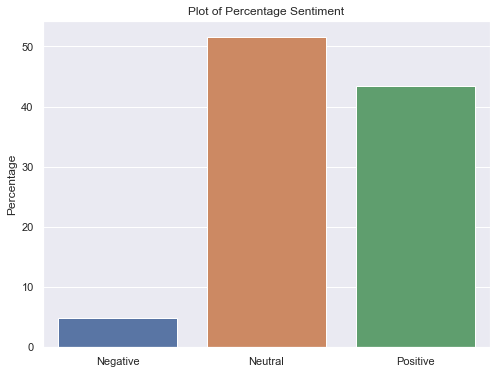

In [7]:
#Plotting a bar chart

sns.set(rc={'figure.figsize':(8,6)})

counts = df2.label.value_counts(normalize=True) * 100

ax = sns.barplot(x=counts.index, y=counts)
ax.set(title="Plot of Percentage Sentiment");
ax.set_xticklabels(['Negative', 'Neutral', 'Positive']);
ax.set_ylabel("Percentage");

#### Note:

##### Assumptions
- Values greater than 5 in positive column are considered positive
- Values greater than 3 in negative column are considered negative
- Values less than 5 in positive column and values less than 3 in negative are considered neutral

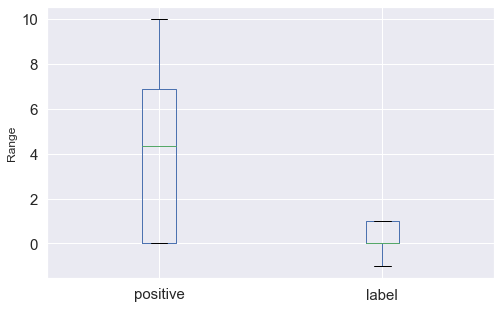

In [8]:
#boxplot to see average values of the labels and the postivity


boxplot = df2.boxplot(column=['positive','label'], 
                     fontsize = 15,grid = True, vert=True,figsize=(8,5,))
plt.ylabel('Range');

In [9]:
#Classify Ratings based on high or low

def convert_rating(rating_values):
    if(int(rating_values == 1) or int(rating_values) == 2 or int(rating_values) == 3):
        return 0
    else:
        return 1
   
df2["Ratings_classified"] = df2["overallRating"]
df2.Ratings_classified = df2.Ratings_classified.apply(convert_rating)

c:\users\bamid\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
c:\users\bamid\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


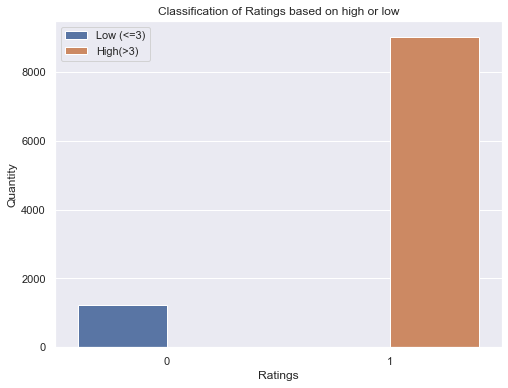

In [10]:
df2.head()
df2.overallRating.value_counts()
sns.set(rc={'figure.figsize':(8,6)})
ax = sns.countplot(x = 'Ratings_classified' , hue = 'Ratings_classified' , data = df2).set(title="Classification of Ratings based on high or low", xlabel="Ratings", ylabel="Quantity")
plt.legend(["Low (<=3)", "High(>3)"])
plt.show()

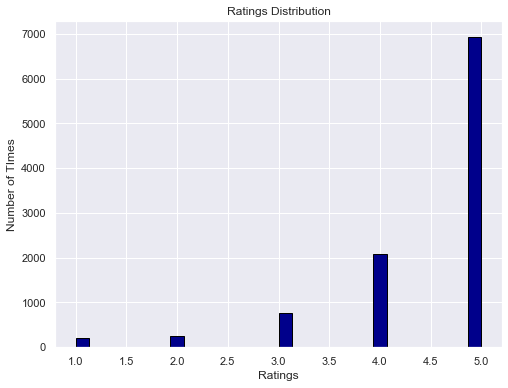

In [11]:
#Ratings Distribution for dataset

plt.hist(df2['overallRating'], color = 'darkblue', edgecolor = 'black', density=False,
         bins = int(30))
plt.title('Ratings Distribution');
plt.xlabel("Ratings");
plt.ylabel("Number of TImes");

from pylab import rcParams
rcParams['figure.figsize'] = 8,8

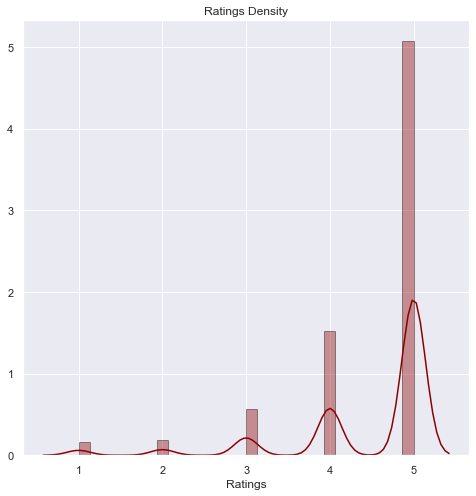

In [12]:
#Placing a density curve on the distribution

sns.distplot(df2['overallRating'], hist=True, kde=True, 
             bins=int(30), color = 'darkred',
             hist_kws={'edgecolor':'black'},axlabel ='Ratings')
plt.title('Ratings Density')

from pylab import rcParams
rcParams['figure.figsize'] = 8,8

### Frequent Words

_In natural language processing, useless words (data), are referred to as Stop Words_

In [13]:
#nltk.download()

stopwords = nltk.corpus.stopwords.words('english')
RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))
words = (df.summary
           .str.lower()
           .replace([r'\|',r'\&',r'\-',r'\.',r'\,',r'\'', RE_stopwords], [' ', '','','','','',''], regex=True)
           .str.cat(sep=' ')
           .split()
)

In [35]:
from collections import Counter

# generate DF out of Counter
rslt = pd.DataFrame(Counter(words).most_common(10),
                    columns=['Word', 'Frequency']).set_index('Word')
rslt

,Frequency
Word,
great,1828
good,1157
nice,526
guitar,524
works,486
price,450
strings,394
best,367
quality,262


_These are ten most commonly used words by the reviewer_

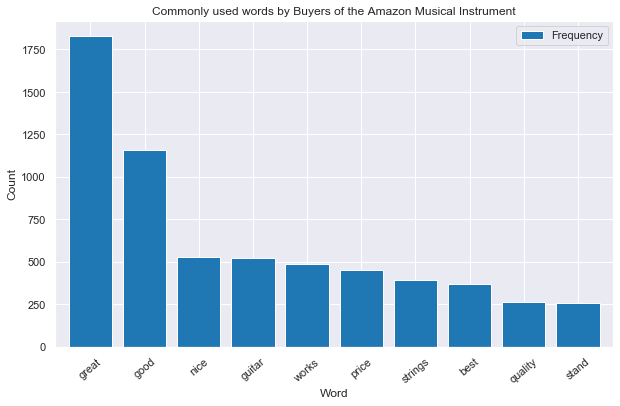

In [36]:
rslt_wordcloud = pd.DataFrame(Counter(words).most_common(100),
                    columns=['Word', 'Frequency'])
#BAR CHART
rslt.plot.bar(rot=40, figsize=(10,6), width=0.8,colormap='tab10')
plt.title("Commonly used words by Buyers of the Amazon Musical Instrument")
plt.ylabel("Count")

from pylab import rcParams
rcParams['figure.figsize'] = 8,6

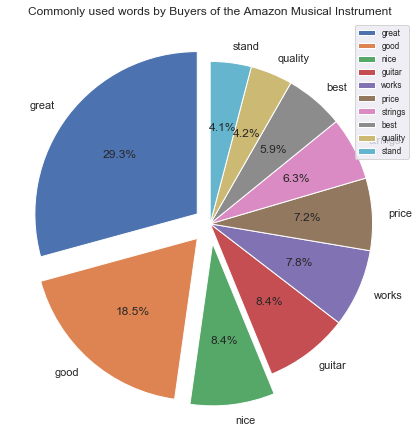

In [16]:
#PIE CHART

explode = (0.1, 0.12, 0.122, 0,0,0,0,0,0,0)  # explode 1st slice
labels=['great',
        'good',
        'nice',
        'guitar',
        'works',
        'price',
        'strings',
        'best',
        'quality',
        'stand',]

plt.pie(rslt['Frequency'], explode=explode,labels =labels , autopct='%1.1f%%',
        shadow=False, startangle=90)
plt.legend( labels, loc='best',fontsize='x-small',markerfirst = True)
plt.tight_layout()
plt.title("Commonly used words by Buyers of the Amazon Musical Instrument")
plt.show()

import matplotlib as mpl
mpl.rcParams['font.size'] = 10

### Make a wordcloud of common words in the review

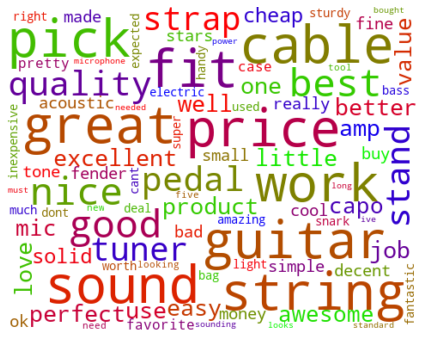

<Figure size 720x720 with 0 Axes>

In [23]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import random

wordcloud = WordCloud(max_font_size=60, max_words=100, width=480, height=380,colormap="brg",
                      background_color="white").generate(' '.join(rslt_wordcloud['Word']));
                      
plt.imshow(wordcloud, interpolation='bilinear');
plt.axis("off");
plt.figure(figsize=[10,10]);
plt.show();